<a href="https://colab.research.google.com/github/Barbhuiya12/Machine-Learning-/blob/main/AR%2CARMA%2CARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Assaignment**

**Importing the required library**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

# Load the CSV data
df = pd.read_csv('Altuma.csv', index_col=0, parse_dates=True)


**Data Preprocessing**

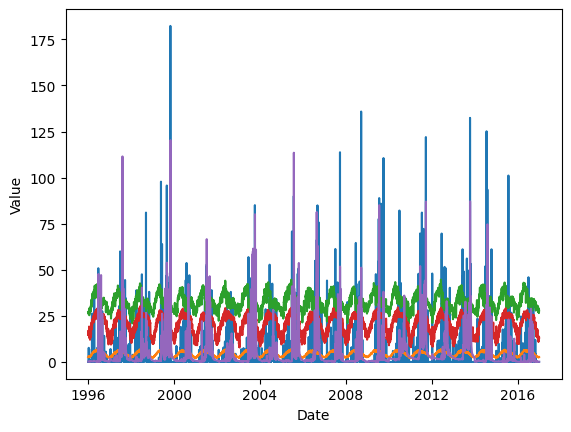

In [ ]:
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


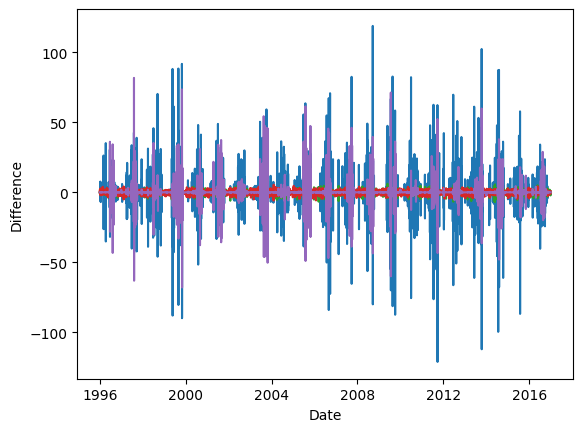

In [ ]:
# First difference the data
diff1 = df.diff().dropna()

# Plot the differenced data
plt.plot(diff1)
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()


In [ ]:
a=df["target"]

**Autoregressions**
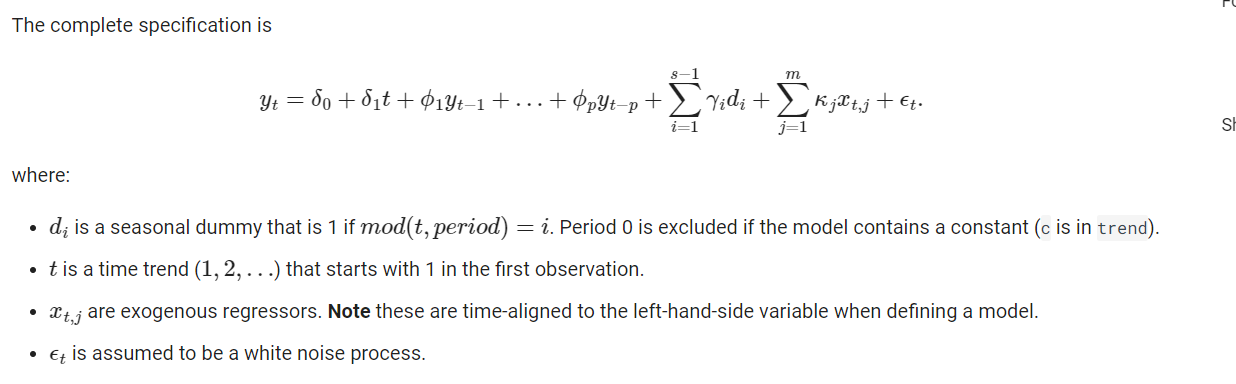

In [ ]:
# Fit an AR model
mod = AutoReg(a, 3, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 target   No. Observations:                 7671
Model:                     AutoReg(3)   Log Likelihood              -23427.439
Method:               Conditional MLE   S.D. of innovations              5.136
Date:                Thu, 13 Apr 2023   AIC                          46864.877
Time:                        05:52:02   BIC                          46899.601
Sample:                    01-04-1996   HQIC                         46876.788
                         - 12-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7316      0.067     11.001      0.000       0.601       0.862
target.L1      0.6128      0.011     54.043      0.000       0.591       0.635
target.L2      0.0683      0.013      5.137      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 target   No. Observations:                 7671
Model:                     AutoReg(3)   Log Likelihood              -23427.439
Method:               Conditional MLE   S.D. of innovations              5.136
Date:                Thu, 13 Apr 2023   AIC                          46864.877
Time:                        05:52:02   BIC                          46899.601
Sample:                    01-04-1996   HQIC                         46876.788
                         - 12-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7316      0.076      9.603      0.000       0.582       0.881
target.L1      0.6128      0.052     11.804      0.000       0.511       0.715
target.L2      0.0683      0.047      1.466      0.1

In [ ]:
sel = ar_select_order(a, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                 target   No. Observations:                 7671
Model:                    AutoReg(12)   Log Likelihood              -23245.707
Method:               Conditional MLE   S.D. of innovations              5.034
Date:                Thu, 13 Apr 2023   AIC                          46519.413
Time:                        05:52:02   BIC                          46616.624
Sample:                    01-13-1996   HQIC                         46552.760
                         - 12-31-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4339      0.068      6.383      0.000       0.301       0.567
target.L1      0.5790      0.011     50.737      0.000       0.557       0.601
target.L2      0.0424      0.013      3.211      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


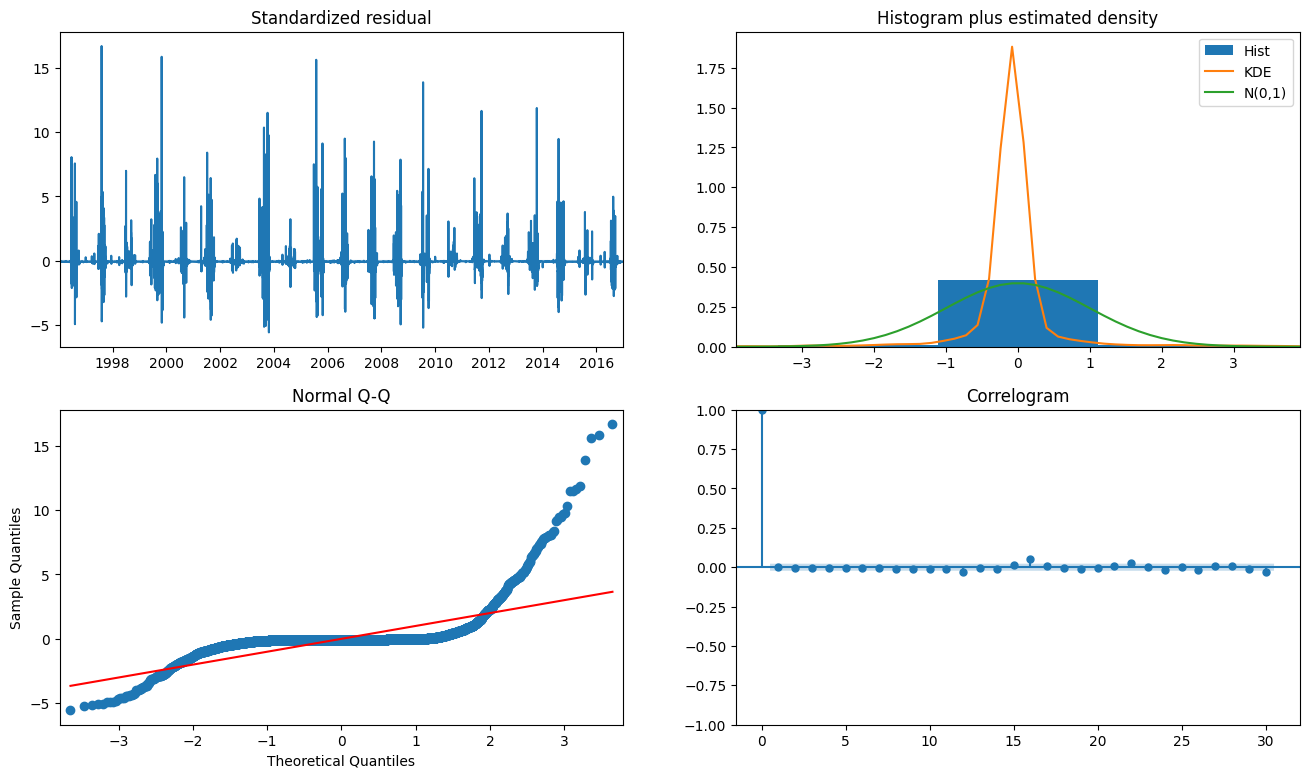

In [ ]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

 **ARMA**


The ARMA model is a combination of the AR and MA models, and assumes that the value of a variable at a given time point is a linear combination of both its past values and past error terms, plus some current error term. The order of the AR component is denoted as p, and the order of the MA component is denoted as q

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


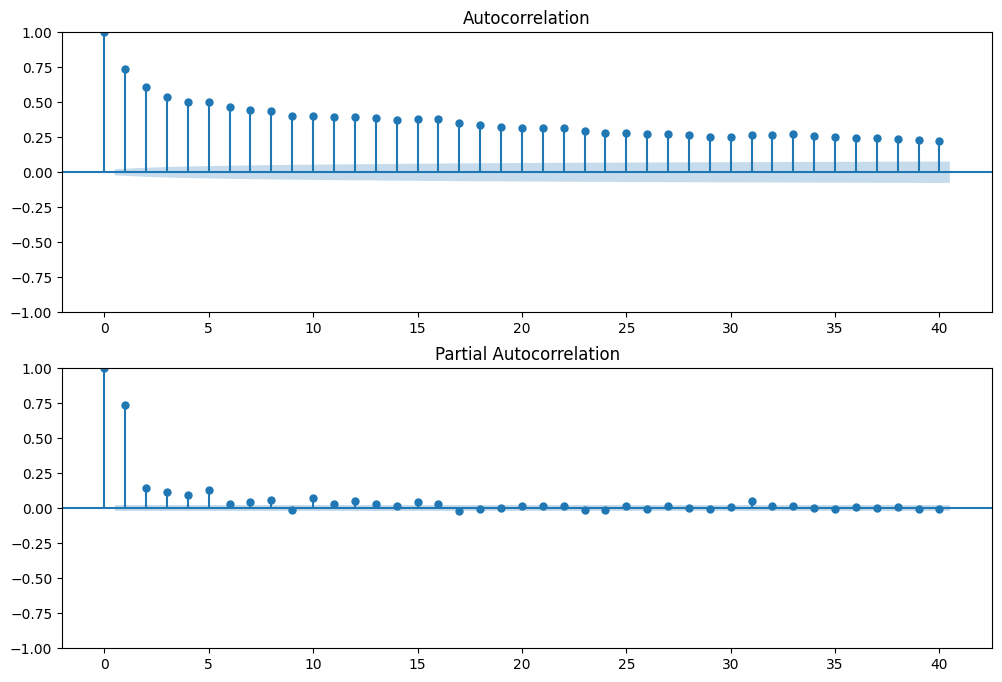

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(a.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(a, lags=40, ax=ax2)

In [ ]:
##Fitting ARMA model 
arma_mod20 = ARIMA(a, order=(2, 0, 2)).fit()
print(arma_mod20.params)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

const      3.523360
ar.L1      1.498722
ar.L2     -0.505990
ma.L1     -0.912077
ma.L2     -0.000241
sigma2    27.419547
dtype: float64


**ARIMA**

The ARIMA model is an extension of the ARMA model that includes a differencing component. The differencing component removes any trend or seasonality in the data, making it easier to model with an ARMA model. The order of the differencing component, denoted as d, refers to the number of times the data is differenced. For example, if the original data has a linear trend, then one difference would remove the trend.

In [ ]:
result = df['target']
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))



ADF Statistic: 0.174369709
p-value: 0.181039588


In [ ]:
# Import the library
from pmdarima import auto_arima
tepwise_fit = auto_arima(df['target'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=78.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=54507.768, Time=0.47 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=49696.373, Time=8.92 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=49275.919, Time=13.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=54505.768, Time=0.57 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=52307.802, Time=3.64 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=51.92 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=88.46 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=50692.065, Time=10.80 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=129.85 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=52116.623, Time=6.67 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=27.30 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=34.53 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=72.63 sec
 ARIMA(0,0,1)(0,1,1)[12]             